In [ ]:
# install tensorflow-gpu
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.9.1


In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [ ]:
# Importing Dataset
churn_df = pd.read_csv('Churn_Modelling.csv')
# churn_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/Churn_Modelling Dataset')
churn_df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
churn_df.shape

(10000, 14)

In [ ]:
churn_df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
churn_df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
churn_df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [ ]:
churn_df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
churn_df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
# churn_df = churn_df.iloc[:, 3:14]
churn_df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
churn_df.shape

(10000, 11)

 ***Exited***

**Exited and has Credit Card**

In [ ]:
Exited_1_and_HasCrCard_1 = churn_df[(churn_df['Exited'] == 1) & (churn_df['HasCrCard'] == 1)]
Exited_1_and_HasCrCard_1.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
3703          739   Germany    Male   40       5  149131.03              3   
7915          695     Spain    Male   56       1       0.00              3   
7159          525    France  Female   59       6   55328.40              1   
4218          589   Germany  Female   19       9   83495.11              1   
6899          569    France    Male   66       2       0.00              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
3703          1               1         60036.99       1  
7915          1               0        187734.49       1  
7159          1               0         83342.73       1  
4218          1               1        143022.31       1  
6899          1               0        130784.20       1

In [ ]:
Exited_1_and_HasCrCard_1.shape

(1424, 11)

**Observation**

1424 persons are Exited and they have Credit Cards.

**Exited and has No Credit Card**

In [ ]:
Exited_1_and_HasCrCard_0 = churn_df[(churn_df['Exited'] == 1) & (churn_df['HasCrCard'] == 0)]
Exited_1_and_HasCrCard_0.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
4512          666    France    Male   51       2  148222.65              1   
1398          693    France  Female   38       3       0.00              2   
5424          580   Germany    Male   44       9  143391.07              1   
3367          581   Germany    Male   40       0  101016.53              1   
598           683   Germany  Female   57       5  162448.69              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
4512          0               0        156953.54       1  
1398          0               0         78133.48       1  
5424          0               0        146891.07       1  
3367          0               1          7926.35       1  
598           0               0          9221.78       1

In [ ]:
Exited_1_and_HasCrCard_0.shape

(613, 11)

**Observation**

1424 persons are Exited and they don't have Credit Cards.

Equal Number of Exited persons who have Credit Card and don't have Credit Card

**Exited and Active Member**

In [ ]:
Exited_1_and_IsActiveMember_1 = churn_df[(churn_df['Exited'] == 1) & (churn_df['IsActiveMember'] == 1)]
Exited_1_and_IsActiveMember_1.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
4822          745    France  Female   32       2       0.00              4   
3783          647     Spain  Female   26       8  109958.15              1   
8240          790   Germany    Male   50       8  121438.58              1   
933           512     Spain    Male   36       1       0.00              1   
6109          581   Germany  Female   26       3  105099.45              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
4822          0               1        179705.13       1  
3783          1               1        136592.24       1  
8240          1               1        176471.78       1  
933           0               1        135482.26       1  
6109          1               1        184520.00       1

In [ ]:
Exited_1_and_IsActiveMember_1.shape

(735, 11)

**Observation**

735 persons are Exited and they are active member.

**Exited and Not Active Member**

In [ ]:
Exited_1_and_IsActiveMember_0 = churn_df[(churn_df['Exited'] == 1) & (churn_df['IsActiveMember'] == 0)]
Exited_1_and_IsActiveMember_0.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
5640          477   Germany  Female   24       2   95675.62              2   
5972          548   Germany    Male   49       9  108437.89              1   
172           480   Germany    Male   44      10  129608.57              1   
6895          610   Germany    Male   49       6  113882.33              1   
7098          621   Germany    Male   51       4  109978.83              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
5640          0               0        162699.70       1  
5972          0               0        127022.87       1  
172           1               0          5472.70       1  
6895          1               0        195813.81       1  
7098          0               0        177740.58       1

In [ ]:
Exited_1_and_IsActiveMember_0.shape

(1302, 11)

**Observation**

1302 persons are Exited and they are not active member.

**Exited But they have Credit Card and Active Member**

In [ ]:
Exited_1_and_HasCrCard_1_and_IsActiveMember_1 = churn_df[(churn_df['Exited'] == 1) & (churn_df['HasCrCard'] == 1) & (churn_df['IsActiveMember'] == 1)]
Exited_1_and_HasCrCard_1_and_IsActiveMember_1.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
6325          743   Germany    Male   59       5  108585.35              1   
4889          691   Germany  Female   41       8  109153.96              3   
6897          492    France  Female   48       6  127253.98              1   
720           672     Spain  Female   56       2  209767.31              2   
936           775    France    Male   52       8  109922.61              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
6325          1               1        192127.22       1  
4889          1               1        148848.76       1  
6897          1               1         92144.09       1  
720           1               1        150694.42       1  
936           1               1         96823.32       1

In [ ]:
Exited_1_and_HasCrCard_1_and_IsActiveMember_1.shape

(482, 11)

**Observation**

482 persons are Exited. But they have Credit Cards and they are active member.

**Exited But they have No Credit Card and Not Active Member**

In [ ]:
Exited_1_and_HasCrCard_0_and_IsActiveMember_0 = churn_df[(churn_df['Exited'] == 1) & (churn_df['HasCrCard'] == 0) & (churn_df['IsActiveMember'] == 0)]
Exited_1_and_HasCrCard_0_and_IsActiveMember_0.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
293           750     Spain  Female   34       9  112822.26              1   
2395          672    France    Male   52       8  170008.84              1   
7567          629    France    Male   44       5       0.00              4   
8027          684     Spain    Male   39       4  207034.96              2   
2752          698     Spain  Female   31       8  185078.26              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
293           0               0        150401.53       1  
2395          0               0         56407.42       1  
7567          0               0        117572.59       1  
8027          0               0        157694.76       1  
2752          0               0        115337.74       1

In [ ]:
Exited_1_and_HasCrCard_0_and_IsActiveMember_0.shape

(360, 11)

**Observation**

360 persons are Exited. But they don't have Credit Cards and they are not active member.

 ***Not Exited***

**Not Exited and has Credit Card**

In [ ]:
Exited_0_and_HasCrCard_1 = churn_df[(churn_df['Exited'] == 0) & (churn_df['HasCrCard'] == 1)]
Exited_0_and_HasCrCard_1.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
3541          838     Spain  Female   67       4  103267.80              1   
9468          613   Germany  Female   45       9  142765.24              2   
1542          530    France  Female   33       4  129307.32              1   
3393          710    France    Male   30       6       0.00              2   
4475          640    France    Male   40       8  110340.68              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
3541          1               1         78310.04       0  
9468          1               0         34749.65       0  
1542          1               1        172930.28       0  
3393          1               1          8991.17       0  
4475          1               1        157886.60       0

In [ ]:
Exited_0_and_HasCrCard_1.shape

(5631, 11)

**Observation**

5631 persons are Not Exited and they have Credit Cards.

**Not Exited and has No Credit Card**

In [ ]:
Exited_0_and_HasCrCard_0 = churn_df[(churn_df['Exited'] == 0) & (churn_df['HasCrCard'] == 0)]
Exited_0_and_HasCrCard_0.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
670           624   Germany  Female   48       3  122388.38              2   
9769          656    France    Male   44      10  143571.52              1   
1112          690    France  Female   42       3   92578.14              2   
8499          498   Germany    Male   35       2  121968.11              2   
6678          472     Spain  Female   32       1  159397.75              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
670           0               0         30020.09       0  
9769          0               0        127444.14       0  
1112          0               0         70810.60       0  
8499          0               1        188343.05       0  
6678          0               1         57323.18       0

In [ ]:
Exited_0_and_HasCrCard_0.shape

(2332, 11)

**Observation**

2332 persons are Not Exited and they don't have Credit Cards.

**Not Exited and Active Member**

In [ ]:
Exited_0_and_IsActiveMember_1 = churn_df[(churn_df['Exited'] == 0) & (churn_df['IsActiveMember'] == 1)]
Exited_0_and_IsActiveMember_1.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1415          799   Germany    Male   28       7  167658.33              2   
2278          473    France  Female   33       5  125827.43              1   
7106          646    France    Male   40       5   93680.43              2   
2150          668    France    Male   38      10   86977.96              1   
8942          667    France  Female   37       9   71786.90              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1415          1               1        111138.25       0  
2278          0               1        145698.73       0  
7106          1               1        179473.26       0  
2150          0               1         37094.75       0  
8942          1               1         67734.79       0

In [ ]:
Exited_0_and_IsActiveMember_1.shape

(4416, 11)

**Observation**

4416 persons are Not Exited and they are active member.

**Not Exited and Not Active Member**

In [ ]:
Exited_0_and_IsActiveMember_0 = churn_df[(churn_df['Exited'] == 0) & (churn_df['IsActiveMember'] == 0)]
Exited_0_and_IsActiveMember_0.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
1672          513    France  Female   37       6       0.00              2   
3173          485    France  Female   27       3       0.00              2   
2965          499   Germany    Male   36       5  131142.53              2   
7354          733   Germany  Female   30       1  102452.71              1   
7857          850    France    Male   27       6   96654.72              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
1672          1               0        110142.34       0  
3173          1               0        141449.86       0  
2965          1               0        174918.46       0  
7354          1               0         21556.95       0  
7857          0               0        152740.16       0

In [ ]:
Exited_0_and_IsActiveMember_0.shape

(3547, 11)

**Observation**

3547 persons are Not Exited and they are not active member.

**Not Exited But they have Credit Card and Active Member**

In [ ]:
Exited_0_and_HasCrCard_1_and_IsActiveMember_1 = churn_df[(churn_df['Exited'] == 0) & (churn_df['HasCrCard'] == 1) & (churn_df['IsActiveMember'] == 1)]
Exited_0_and_HasCrCard_1_and_IsActiveMember_1.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
8980          650   Germany  Female   35       3  165982.43              2   
7412          697    France    Male   36       7       0.00              2   
914           569    France    Male   35      10  124525.52              1   
8180          744    France    Male   42       1  112419.92              1   
8485          670    France    Male   25       7       0.00              2   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
8980          1               1         24482.16       0  
7412          1               1         74760.32       0  
914           1               1        193793.78       0  
8180          1               1         83022.92       0  
8485          1               1        144723.38       0

In [ ]:
Exited_0_and_HasCrCard_1_and_IsActiveMember_1.shape

(3125, 11)

**Observation**

3125 persons are Not Exited. But they have Credit Cards and they are active member.

**Not Exited But they have No Credit Card and Not Active Member**

In [ ]:
Exited_0_and_HasCrCard_0_and_IsActiveMember_0 = churn_df[(churn_df['Exited'] == 0) & (churn_df['HasCrCard'] == 0) & (churn_df['IsActiveMember'] == 0)]
Exited_0_and_HasCrCard_0_and_IsActiveMember_0.sample(5)

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
5239          766   Germany    Male   44       3  116822.70              1   
6199          449     Spain  Female   33       8       0.00              2   
8971          408    France    Male   40       3       0.00              2   
4069          646    France  Female   34       3  131283.11              1   
3801          699     Spain    Male   31       6  114493.68              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
5239          0               0        197643.24       0  
6199          0               0        156792.89       0  
8971          0               0        124874.23       0  
4069          0               0        130500.65       0  
3801          0               0        138396.32       0

In [ ]:
Exited_0_and_HasCrCard_0_and_IsActiveMember_0.shape

(1041, 11)

**Observation**

1041 persons are Not Exited. But they don't have Credit Cards and they are not active member.

In [ ]:
churn_df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

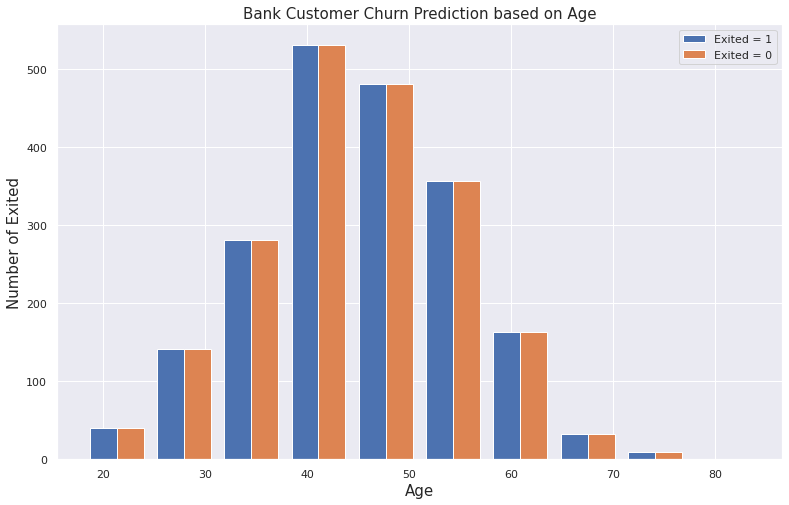

In [ ]:
Age_Exited_1 = churn_df[churn_df['Exited'] == 1].Age
Age_Exited_0 = churn_df[churn_df['Exited'] == 1].Age

plt.figure(figsize= (13,8))
plt.xlabel('Age', fontsize=15)
plt.ylabel('Number of Exited', fontsize=15)
plt.title('Bank Customer Churn Prediction based on Age', fontsize=15)

plt.hist([Age_Exited_1, Age_Exited_0], label=['Exited = 1', 'Exited = 0'])
plt.legend()

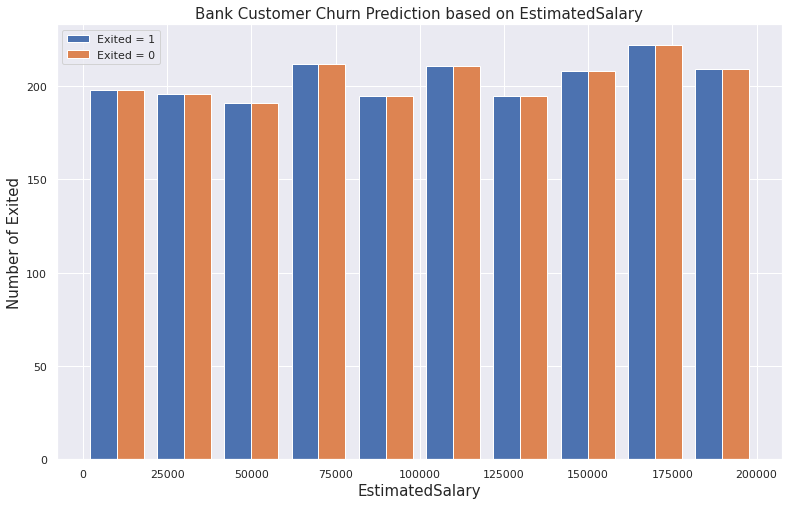

In [ ]:
EstimatedSalary_Exited_1 = churn_df[churn_df['Exited'] == 1].EstimatedSalary
EstimatedSalary_Exited_0 = churn_df[churn_df['Exited'] == 1].EstimatedSalary

plt.figure(figsize= (13,8))
plt.xlabel('EstimatedSalary', fontsize=15)
plt.ylabel('Number of Exited', fontsize=15)
plt.title('Bank Customer Churn Prediction based on EstimatedSalary', fontsize=15)

plt.hist([EstimatedSalary_Exited_1, EstimatedSalary_Exited_0], label=['Exited = 1', 'Exited = 0'])
plt.legend()

In [ ]:
# checking unique values of Geography
churn_df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
churn_df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



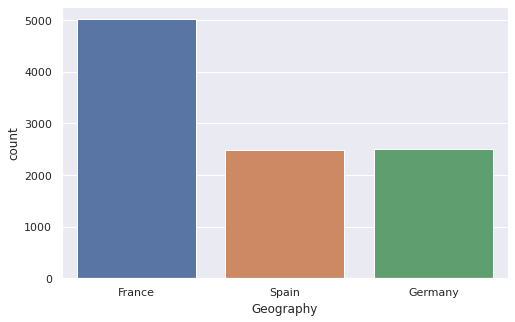

In [ ]:
plt.figure(figsize= (8,5))
sns.countplot(churn_df['Geography'])

In [ ]:
# checking unique values of Gender
churn_df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
churn_df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



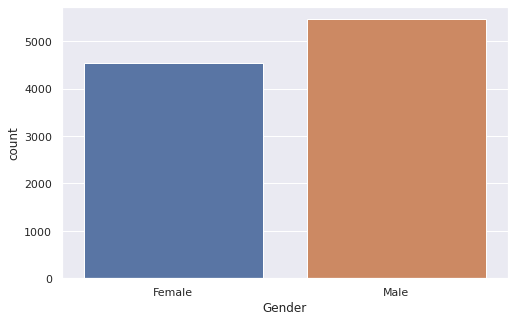

In [ ]:
plt.figure(figsize= (8,5))
sns.countplot(churn_df['Gender'])

In [ ]:
#Create dummy variables
pd.get_dummies(churn_df['Geography'])

France  Germany  Spain
0          1        0      0
1          0        0      1
2          1        0      0
3          1        0      0
4          0        0      1
...      ...      ...    ...
9995       1        0      0
9996       1        0      0
9997       1        0      0
9998       0        1      0
9999       1        0      0

[10000 rows x 3 columns]

In [ ]:
geography = pd.get_dummies(churn_df['Geography'], drop_first=True)
geography

Germany  Spain
0           0      0
1           0      1
2           0      0
3           0      0
4           0      1
...       ...    ...
9995        0      0
9996        0      0
9997        0      0
9998        1      0
9999        0      0

[10000 rows x 2 columns]

In [ ]:
#Create dummy variables
pd.get_dummies(churn_df['Gender'])

Female  Male
0          1     0
1          1     0
2          1     0
3          1     0
4          1     0
...      ...   ...
9995       0     1
9996       0     1
9997       1     0
9998       0     1
9999       1     0

[10000 rows x 2 columns]

In [ ]:
gender = pd.get_dummies(churn_df['Gender'], drop_first=True)
gender

Male
0        0
1        0
2        0
3        0
4        0
...    ...
9995     1
9996     1
9997     0
9998     1
9999     0

[10000 rows x 1 columns]

In [ ]:
## Concatenate the Data Frames
churn_df = pd.concat([churn_df,geography,gender], axis=1)

In [ ]:
churn_df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  Germany  Spain  Male  
0          1               1        101348.88       1        0      0     0  
1          0               1        112542.58       0        0      1     0  
2          1               0        113931.57       1        0      0     0  
3          0               0         93826.63       0        0      0     0  
4          1               1         79084.10       0        0      1     0

In [ ]:
#  drop Geography and Gender column
churn_df = churn_df.drop(['Geography', 'Gender'], axis=1)

In [ ]:
churn_df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Germany  Spain  Male  
0               1        101348.88       1        0      0     0  
1               1        112542.58       0        0      1     0  
2               0        113931.57       1        0      0     0  
3               0         93826.63       0        0      0     0  
4               1         79084.10       0        0      1     0

# Visualization

In [ ]:
col_for_plot = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', ]

**Pairplot**

Pairplot of Bank Customer churn Dataset



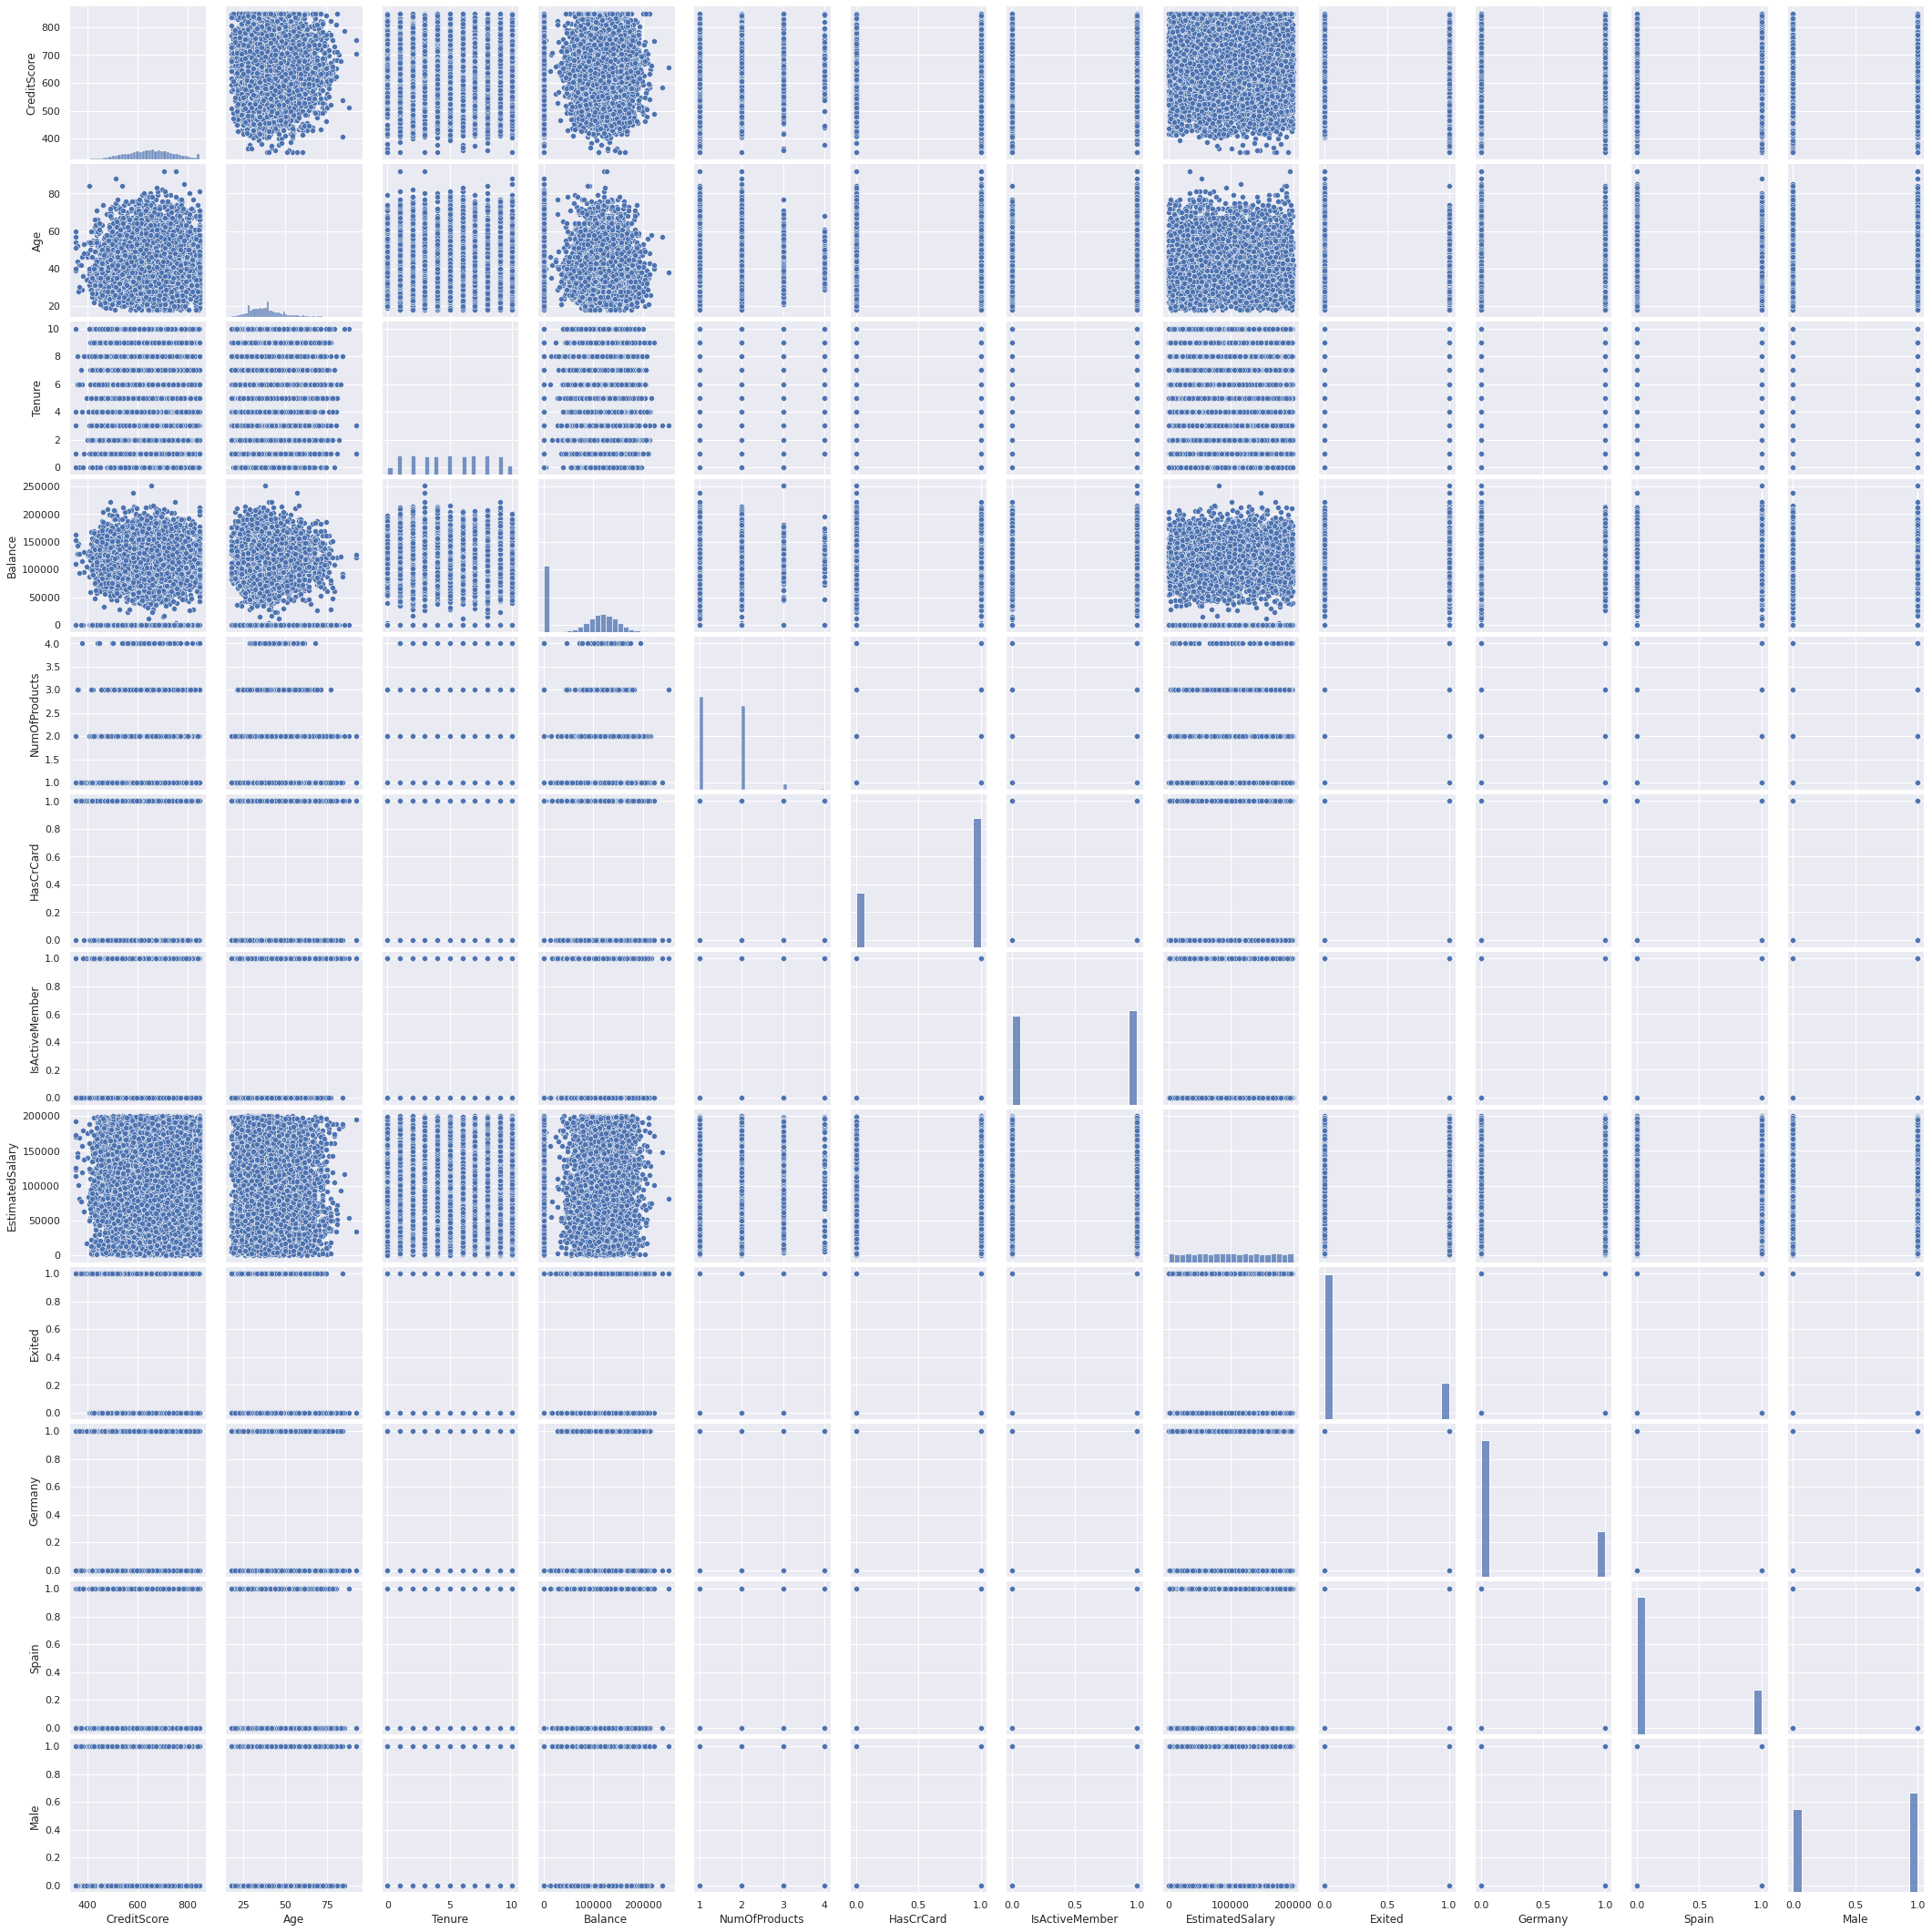

In [ ]:
sns.pairplot(data=churn_df)
print('Pairplot of Bank Customer churn Dataset\n')

Pairplot of Bank Customer churn Dataset



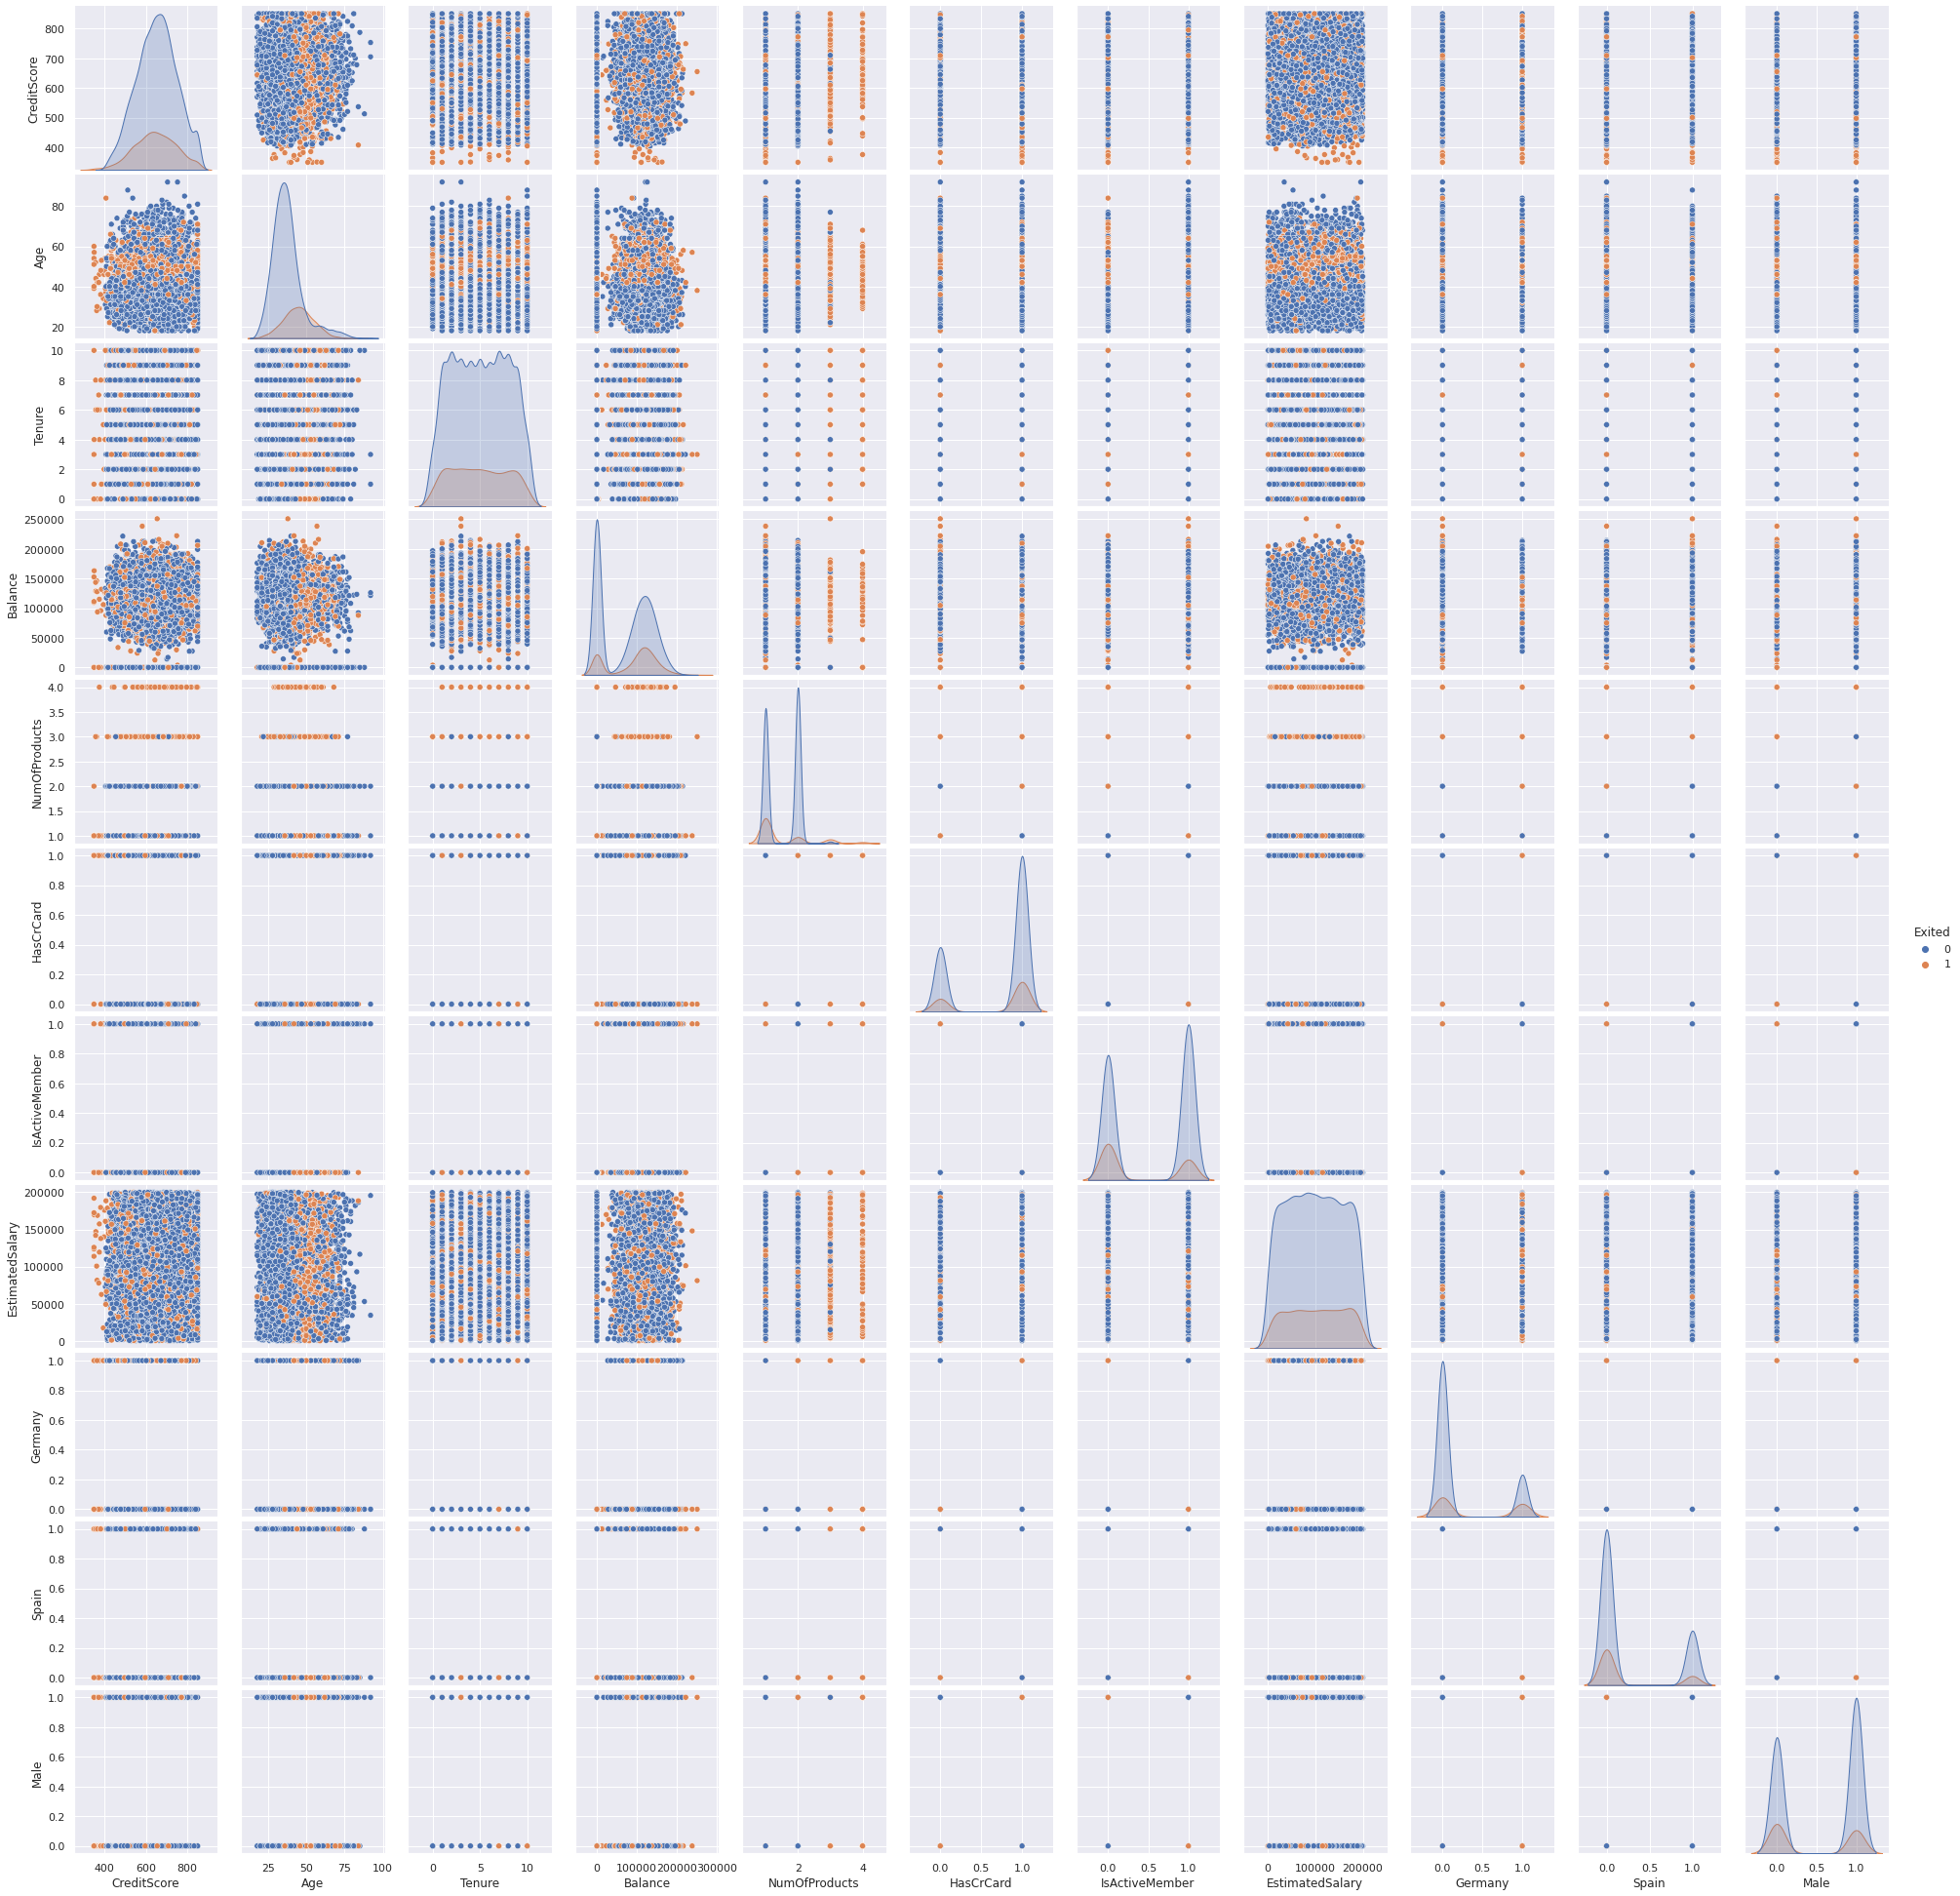

In [ ]:
sns.pairplot(data=churn_df, hue='Exited')
print('Pairplot of Bank Customer churn Dataset\n')

**Histplot**

Histplot in Bank Customer churn Dataset


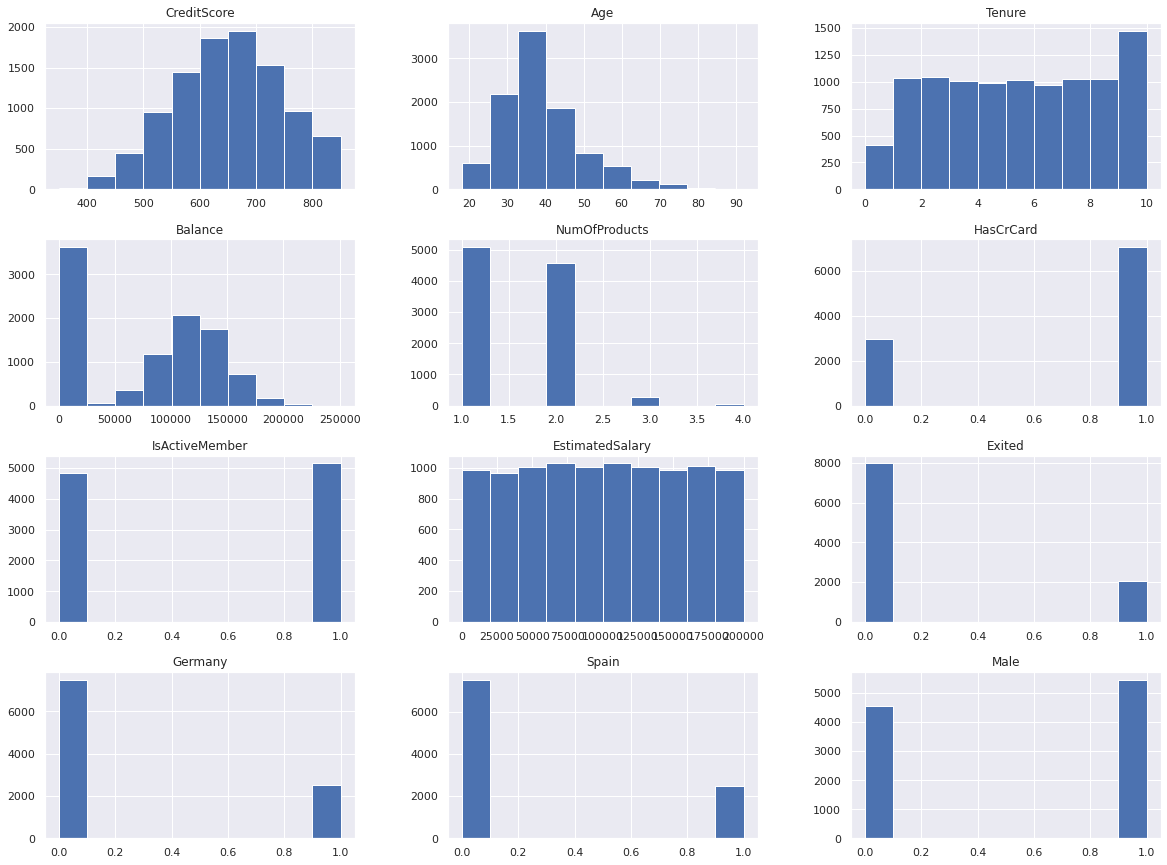

In [ ]:
sns.set(style="darkgrid") # hide graph line
churn_df.hist(figsize=(20,15))
print('Histplot in Bank Customer churn Dataset')
plt.show()

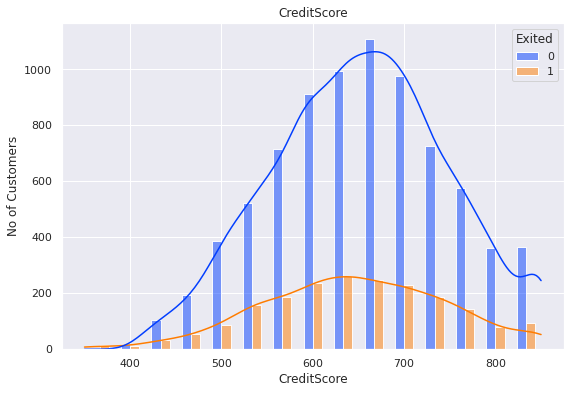

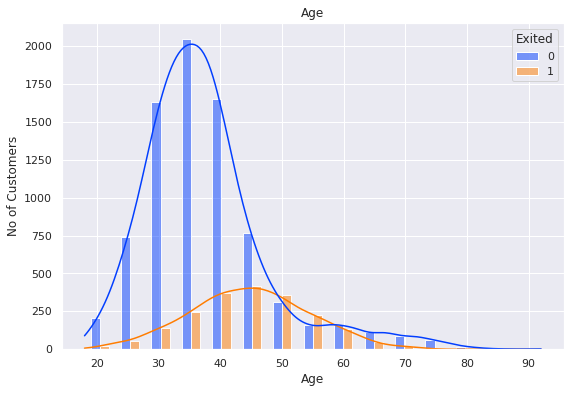

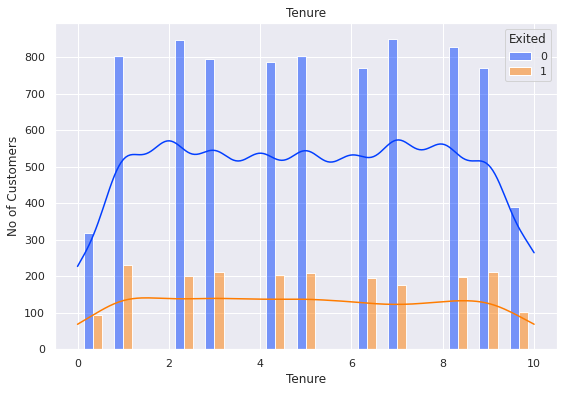

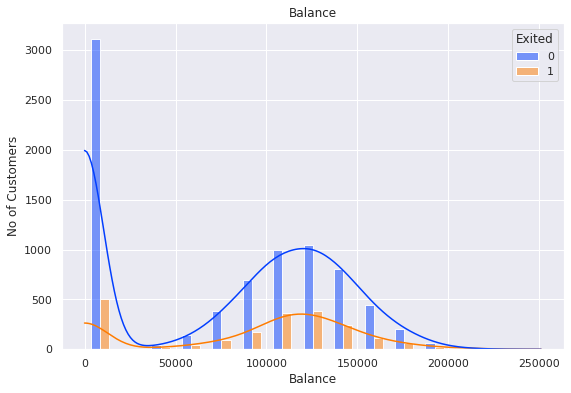

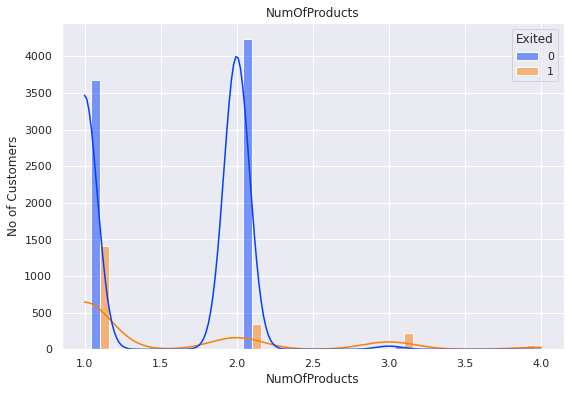

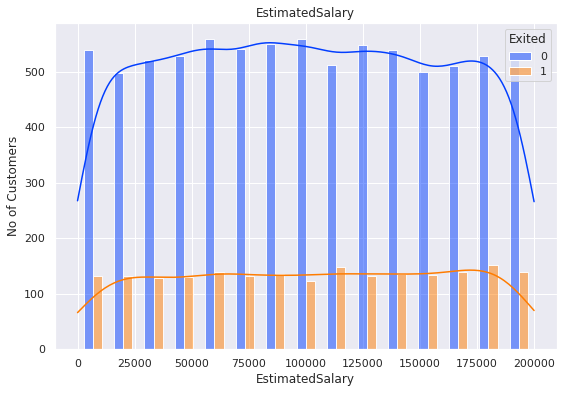

In [ ]:
for hist_plot in col_for_plot:
  plt.figure(figsize=(9,6))
  sns.histplot(data=churn_df,x=hist_plot,bins=15,hue='Exited',multiple='dodge',shrink=0.6,palette='bright',kde=True).set(ylabel='No of Customers',title=hist_plot)

**Distplot**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



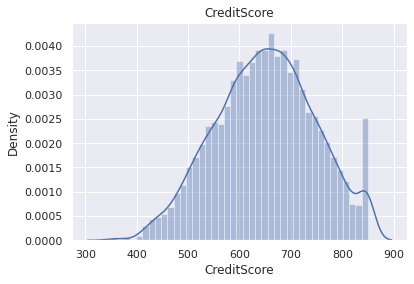

<Figure size 720x504 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



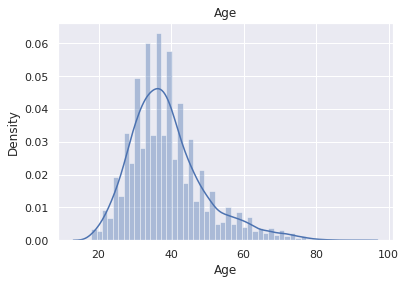

<Figure size 720x504 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



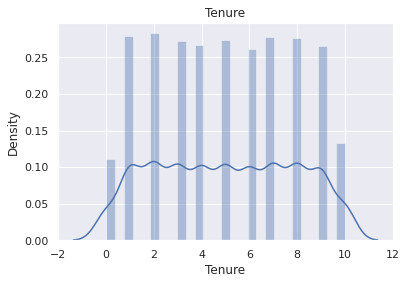

<Figure size 720x504 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



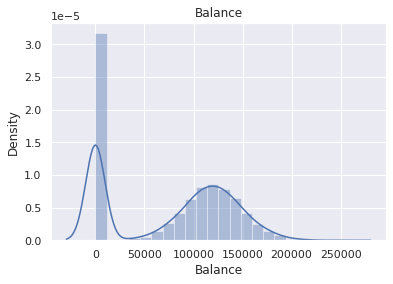

<Figure size 720x504 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



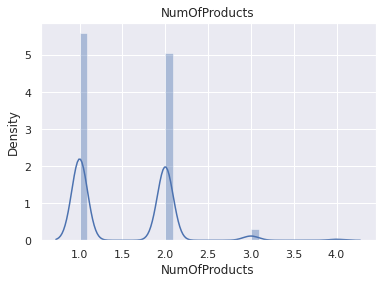

<Figure size 720x504 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



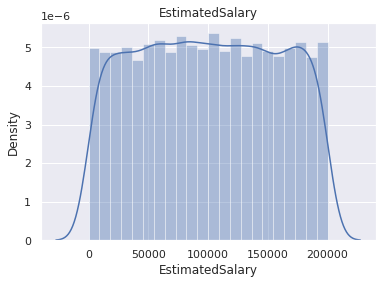

<Figure size 720x504 with 0 Axes>

In [ ]:
for dist_plot in col_for_plot:
    sns.distplot(churn_df[dist_plot])
    plt.title(dist_plot)
    plt.figure(figsize=(10,7))
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



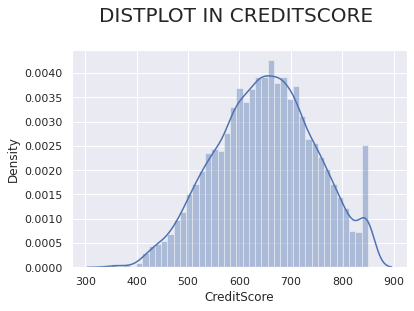

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(churn_df['CreditScore'])
title = 'Distplot in CreditScore \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



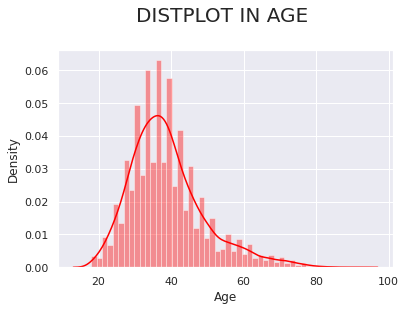

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(churn_df['Age'], color='red')
title = 'Distplot in Age \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



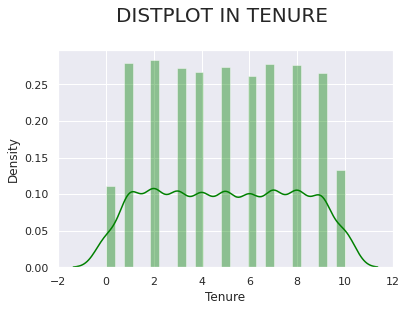

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(churn_df['Tenure'], color='green')
title = 'Distplot in Tenure \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



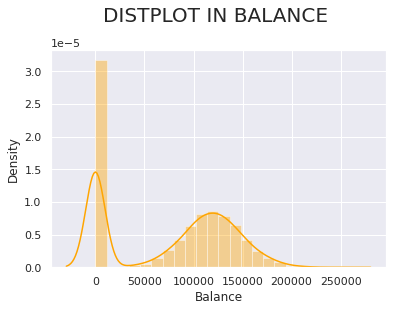

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(churn_df['Balance'], color='orange')
title = 'Distplot in Balance \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



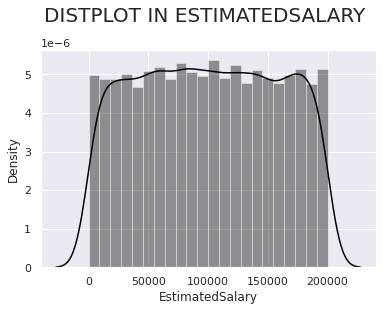

In [ ]:
plt.figure(figsize=(6,4))
sns.distplot(churn_df['EstimatedSalary'], color='black')
title = 'Distplot in EstimatedSalary \n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

**Countplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text major ticklabel objects>)

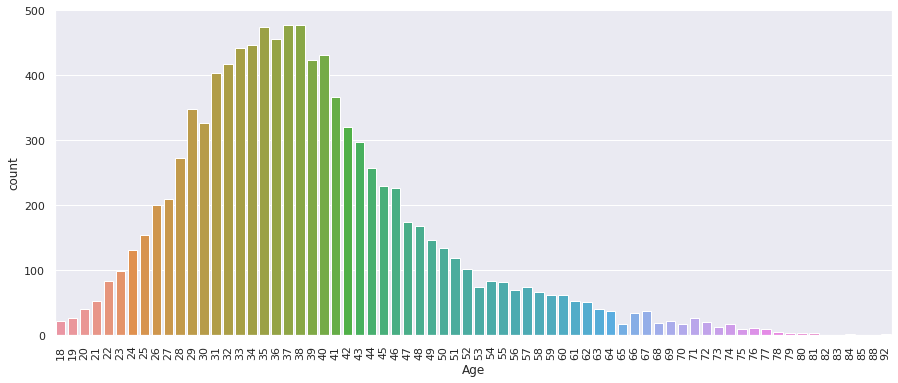

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(churn_df['Age'])
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



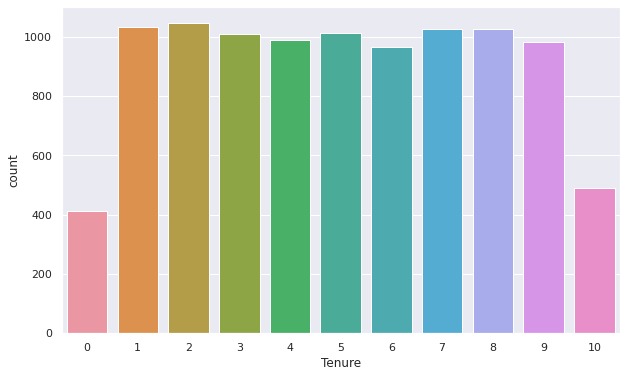

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(churn_df['Tenure'])
# plt.xticks(rotation=90)

**Pie Plot**

In [ ]:
px.pie(churn_df,'IsActiveMember', title = 'Member Is Active \n', width=500, height=400)

In [ ]:
px.pie(churn_df,'HasCrCard', title = 'Has Credit Card \n', width=500, height=400)

In [ ]:
px.pie(churn_df,'Exited', title = 'Exited Member \n', width=500, height=400)

**Scatterplot**

In [ ]:
churn_df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Male'],
      dtype='object')

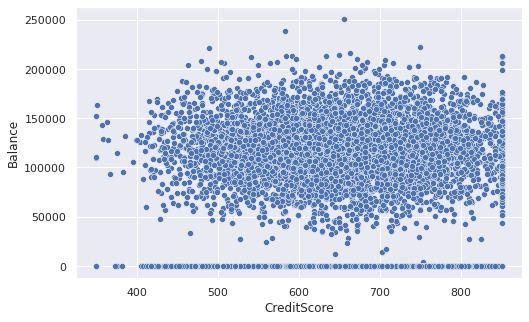

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='CreditScore', y='Balance', data=churn_df)

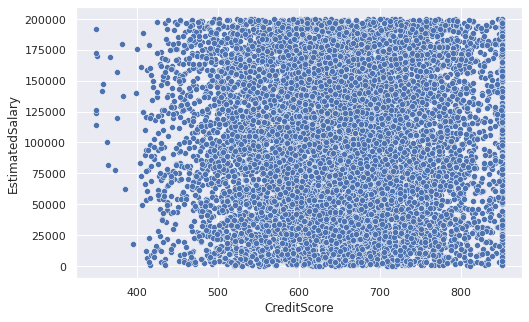

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', data=churn_df)

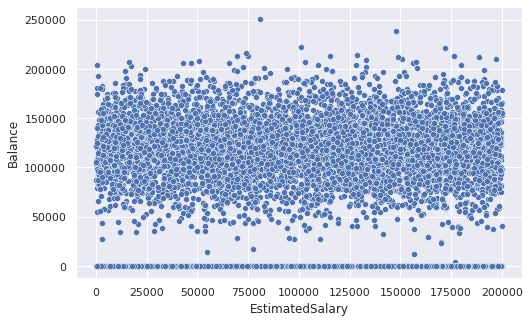

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='EstimatedSalary', y='Balance', data=churn_df)

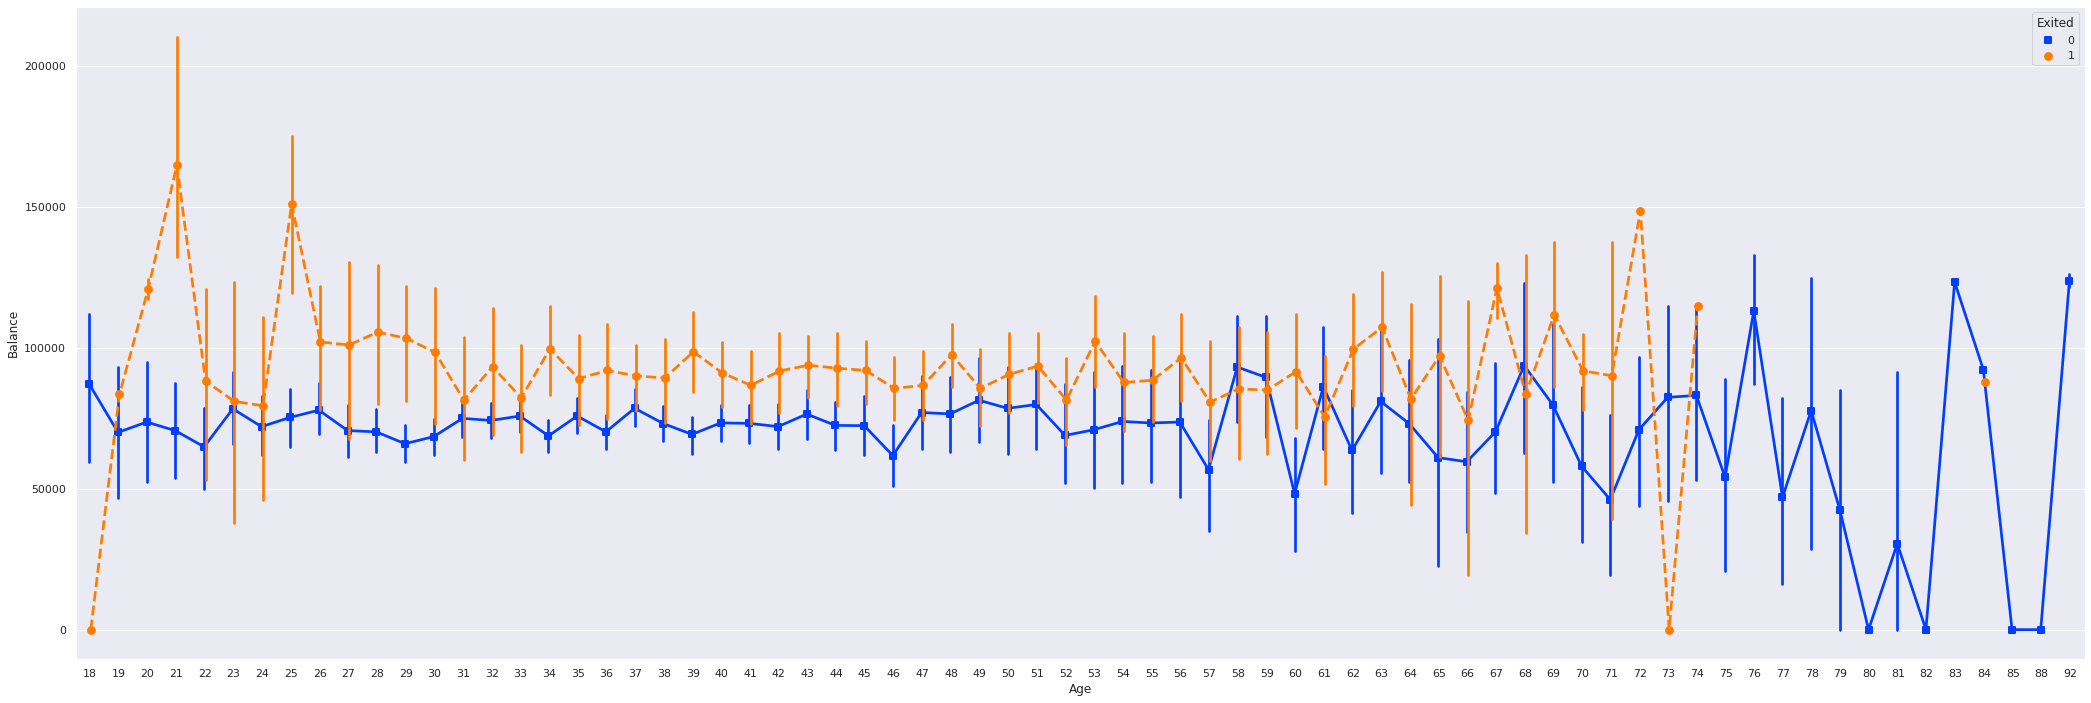

In [ ]:
plt.figure(figsize=(36,12))
sns.pointplot(data=churn_df,x='Age',y='Balance',bins=10,hue='Exited',markers=['s','o'],linestyles=['-','--'],dodge=True,palette='bright')

**Boxplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

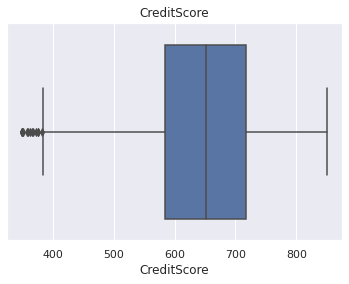

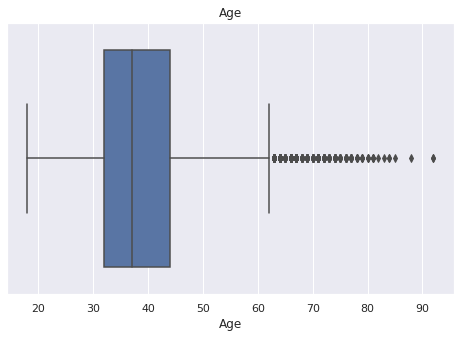

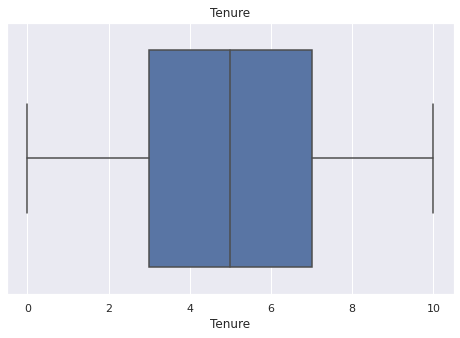

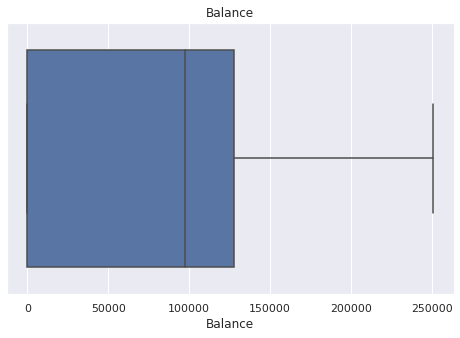

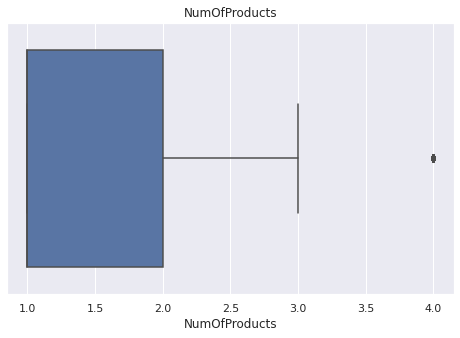

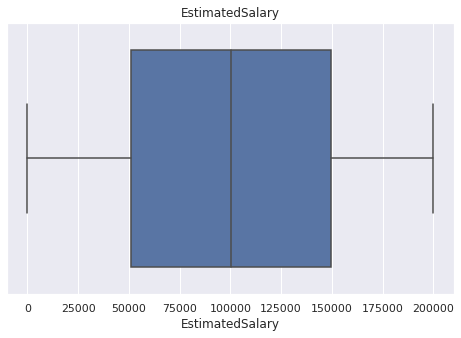

<Figure size 576x360 with 0 Axes>

In [ ]:
for box_plot in col_for_plot:
    # data=rainfall_dataset.copy()
    sns.boxplot(churn_df[box_plot])
    plt.title(box_plot)
    plt.figure(figsize=(8,5))

In [ ]:
churn_df.head(2)

CreditScore  Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0          619   42       2      0.00              1          1   
1          608   41       1  83807.86              1          0   

   IsActiveMember  EstimatedSalary  Exited  Germany  Spain  Male  
0               1        101348.88       1        0      0     0  
1               1        112542.58       0        0      1     0

In [ ]:
# correlation
correlation = churn_df.corr()
correlation

CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
HasCrCard          -0.005458 -0.011721  0.022583 -0.014858       0.003183   
IsActiveMember      0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Exited             -0.027094  0.285323 -0.014001  0.118533      -0.047820   
Germany             0.005538  0.046897 -0.000567  0.401110      -0.010419   
Spain               0.004780 -0.001685  0.003868 -0.134892       0.009039   
Male               -0.002857 -0.027544  0.014733  0.012087      -0.021859   

                 HasCrCard  IsActiveMember  EstimatedSalary    Exited  \
CreditScore      -0.005458        0.025651        -0.001384 -0.027094   
Age              -0.011721        0.085472        -0.007201  0.285323   
Tenure            0.022583       -0.028362         0.007784 -0.014001   
Balance          -0.014858       -0.010084         0.012797  0.118533   
NumOfProducts     0.003183        0.009612         0.014204 -0.047820   
HasCrCard         1.000000       -0.011866        -0.009933 -0.007138   
IsActiveMember   -0.011866        1.000000        -0.011421 -0.156128   
EstimatedSalary  -0.009933       -0.011421         1.000000  0.012097   
Exited           -0.007138       -0.156128         0.012097  1.000000   
Germany           0.010577       -0.020486         0.010297  0.173488   
Spain            -0.013480        0.016732        -0.006482 -0.052667   
Male              0.005766        0.022544        -0.008112 -0.106512   

                  Germany     Spain      Male  
CreditScore      0.005538  0.004780 -0.002857  
Age              0.046897 -0.001685 -0.027544  
Tenure          -0.000567  0.003868  0.014733  
Balance          0.401110 -0.134892  0.012087  
NumOfProducts   -0.010419  0.009039 -0.021859  
HasCrCard        0.010577 -0.013480  0.005766  
IsActiveMember  -0.020486  0.016732  0.022544  
EstimatedSalary  0.010297 -0.006482 -0.008112  
Exited           0.173488 -0.052667 -0.106512  
Germany          1.000000 -0.332084 -0.024628  
Spain           -0.332084  1.000000  0.016889  
Male            -0.024628  0.016889  1.000000

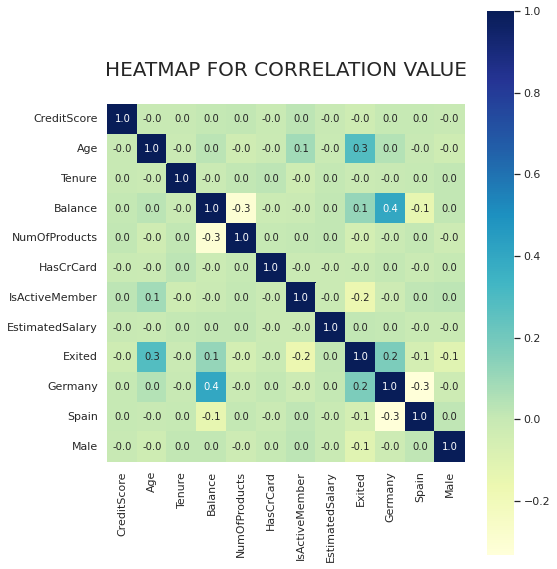

In [ ]:
# constructing a heatmap to understand the correlation
plt.figure(figsize=(8,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='YlGnBu')
title = 'Heatmap for correlation value\n'.upper()
plt.title(title, fontsize=20, loc='center')
plt.show()

In [ ]:
# # Feature Scaling
# col_to_scale=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()
# churn_df[col_to_scale]=scaler.fit_transform(churn_df[col_to_scale])

In [ ]:
churn_df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Germany  Spain  Male  
0               1        101348.88       1        0      0     0  
1               1        112542.58       0        0      1     0  
2               0        113931.57       1        0      0     0  
3               0         93826.63       0        0      0     0  
4               1         79084.10       0        0      1     0

# Split Dataset

In [ ]:
X = churn_df.drop('Exited', axis=1)
y = churn_df['Exited']

In [ ]:
X

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Germany  Spain  Male  
0                  1        101348.88        0      0     0  
1                  1        112542.58        0      1     0  
2                  0        113931.57        0      0     0  
3                  0         93826.63        0      0     0  
4                  1         79084.10        0      1     0  
...              ...              ...      ...    ...   ...  
9995               0         96270.64        0      0     1  
9996               1        101699.77        0      0     1  
9997               1         42085.58        0      0     0  
9998               0         92888.52        1      0     1  
9999               0         38190.78        0      0     0  

[10000 rows x 11 columns]

In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42,)

In [ ]:
X.shape, X_train.shape, X_test.shape

((10000, 11), (8000, 11), (2000, 11))

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
X_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

# ANN

In [ ]:
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(11,), activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation='relu'),
    # keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Early Stopping
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [ ]:
model_history=model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.5117 - accuracy: 0.7869 - val_loss: 0.4512 - val_accuracy: 0.7910
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.4356 - accuracy: 0.7962 - val_loss: 0.4333 - val_accuracy: 0.7910
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4193 - accuracy: 0.7992 - val_loss: 0.4233 - val_accuracy: 0.8012
Epoch 4/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.4019 - accuracy: 0.8059 - val_loss: 0.4071 - val_accuracy: 0.8050
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3839 - accuracy: 0.8166 - val_loss: 0.3938 - val_accuracy: 0.8353
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3684 - accuracy: 0.8483 - val_loss: 0.3873 - val_accuracy: 0.8383
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3585 - accuracy: 0.8556 - val_loss: 0.3764 - val_accuracy:

In [ ]:
# list all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

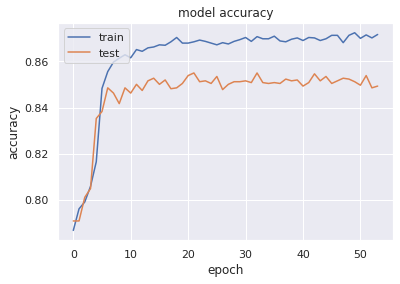

In [ ]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

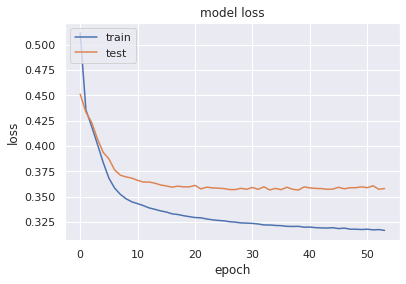

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Making the predictions and evaluating the model
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8640


[0.33961063623428345, 0.8640000224113464]

In [ ]:
# Predicting the Test set results
pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [ ]:
pred[:5]

array([[0.05714702],
       [0.02068664],
       [0.07961918],
       [0.16002387],
       [0.13587214]], dtype=float32)

In [ ]:
y_pred = []
for predict in pred:
    if predict > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)  

In [ ]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [ ]:
y_test[:5]

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(' Classification Report: \n\n', classification_report(y_test, y_pred))

 Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.71      0.51      0.60       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.76      2000
weighted avg       0.85      0.86      0.86      2000



In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1526,   81],
       [ 191,  202]])

Text(48.5, 0.5, 'Truth')

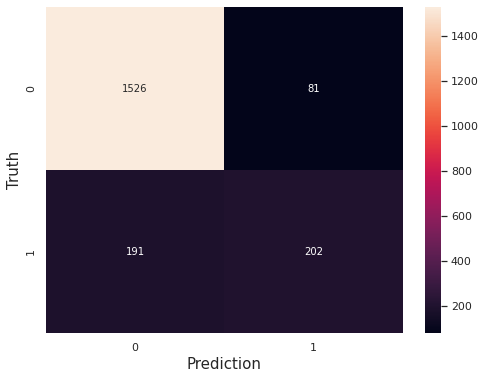

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction', fontsize=15)
plt.ylabel('Truth', fontsize=15)

**Accuracy**

In [ ]:
round((1526+202)/(1526+81+191+202), 2)

0.86

**Precision for 0 class**

In [ ]:
precision_0 = round(1526/(1526+191), 2)
precision_0

0.89

**Precision for 1 class**

In [ ]:
precision_1 = round(202/(202+81),2)
precision_1

0.71

**Recall for 0 class**

In [ ]:
recall_0 = round(1526/(1526+81),2)
recall_0

0.95

**Recall for 1 class**

In [ ]:
recall_1 = round(202/(202+191),2)
recall_1

0.51

**F1-score for 0 class**

In [ ]:
f1_score_0 = round((2*precision_0*recall_0)/(precision_0+recall_0), 2)
f1_score_0

0.92

**F1-score for 1 class**

In [ ]:
f1_score_1 = round((2*precision_1*recall_1)/(precision_1+recall_1), 2)
f1_score_1

0.59